#Аудиториска вежба 3: Data Analysis & Visuelization



### <font color='green'>Data Analysis</font>

Data analysis is the process of cleaning, changing, and processing raw data, and extracting actionable, relevant information that helps businesses make informed decisions. 

The procedure helps reduce the risks inherent in decision-making by providing useful insights and statistics, often presented in charts, images, tables, and graphs.

A simple example of data analysis can be seen whenever we take a decision in our daily lives by evaluating what has happened in the past or what will happen if we make that decision. Basically, this is the process of analyzing the past or future and making a decision based on that analysis.

It’s not uncommon to hear the term “big data” brought up in discussions about data analysis. Data analysis plays a crucial role in processing big data into useful information.

#### Variables: Continuous variables
*   Mean (Average)
*   Median (Middle value)
*   Standard deviation
*   Minimum
*   Maximum
*   Quantile
*   Geometric mean

#### Variables: Categorical variables
*   Frequencies (count or relative) - can be transformed to numeric values

#### Distributions: Normal distribution
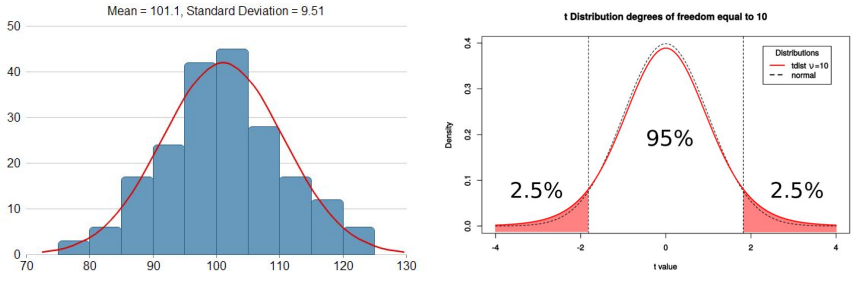

#### Distributions: Gamma distribution 
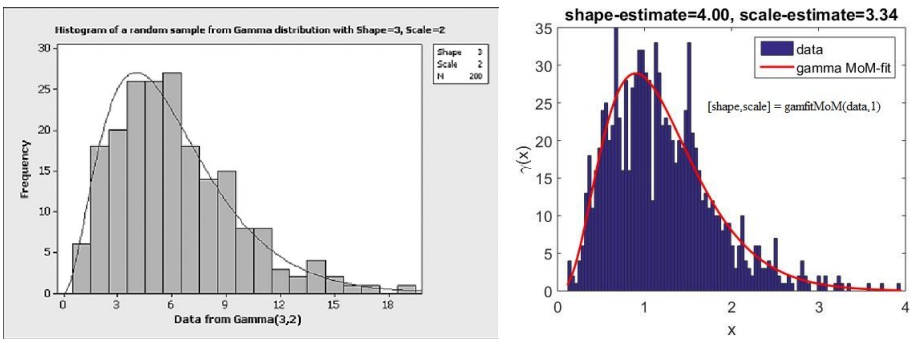

#### Distributions: Exponential distribution
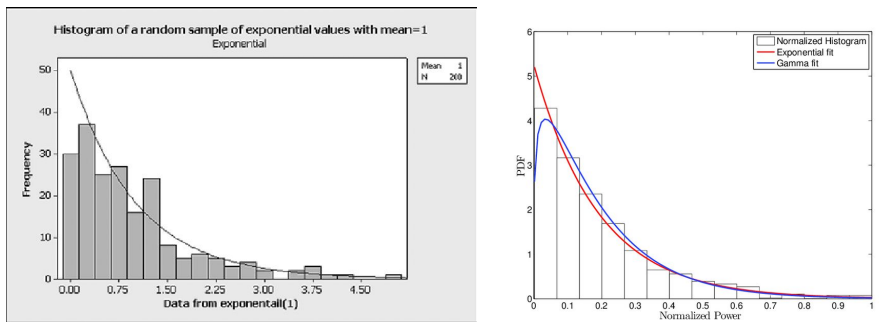



### <font color='pink'>Visuelization</font>
*   Distribution: Histograms, Bar-charts
*   Show trend over time: Stacked area plots
*   Relationship: Scatter plots, Multiple histograms, KDE(Kernel Density Estimation), Box-plots






### <font color='red'>The goal of this exercise</font>

The visual representation of the data will
lead to new information:
*   See how our data behaves
*   See the difference between big amount of
data and small dataset

In [ ]:
import pandas as pd
import requests 
import random

from bs4 import BeautifulSoup

from datetime import date

In [ ]:
import warnings

requests.packages.urllib3.disable_warnings()
warnings.filterwarnings("ignore")

In [ ]:
def get_data(url, path):
  response = requests.get(url)
  html = BeautifulSoup(response.text, "html.parser")

  news_items = html.find_all('div', {'class' : 'Layout-layout'})
  news = []

  #Note: By taking the data from each item separately we make sure that all data we have on the item is its own.
  for i in range(0, len(news_items)):
    item = {}
    card_date = news_items[i].select_one('.Card-time').text
    
    #Note: We need to format the date in the desired format.
    if 'ago' in card_date:
      item['Date'] = date.today().strftime("%a, %b %dth %Y")
    else:
      item['Date'] = card_date
      
    item["Title"] = news_items[i].select_one('.Card-title').select_one('div').text
   
    category = news_items[i].select_one('.Card-eyebrow')

    #Note: We fill the category to be 'No category' in cases where a category is not present.
    if category is None:
      item['Category'] = 'No category'
    else:
       item["Category"] = news_items[i].select_one('.Card-eyebrow').select_one('div').text

    #Note: This data is not related to the web pages we scrape, and are here for demonstration only.
    item['Popularity'] = random.randint(1, len(news_items)) * 10
    item['User comments'] = random.randint(70, 100)

    news.append(item)

  #Note: The idea here is to make the function as automated as possible i.e. for us to save parameters in some place and then call the function X times with those parameters without us watching over it.
  df = pd.DataFrame(news)
  url_parts = url.split("/")
  file_name = path + "/results_" + url_parts[3] + ".csv"
  df.to_csv(file_name, index=False)

  return df

In [ ]:
economy_url = "https://www.cnbc.com/economy/"
finance_url = "https://www.cnbc.com/finance/"
health_science_url = "https://www.cnbc.com/health-and-science/"
energy_url = "https://www.cnbc.com/energy/"
climate_url = "https://www.cnbc.com/climate/"

#Note: Change the path so that this works for you too!
path = "/content/drive/MyDrive/ВНП 22 23 - Вежби/Аудиториски вежби/03"

economy_data = get_data(economy_url, path)
finance_data = get_data(finance_url, path)
health_science_data = get_data(health_science_url, path)
energy_data = get_data(energy_url, path)
climate_data = get_data(climate_url, path)

In [ ]:
economy_data.head(3)

,Date,Title,Category,Popularity,User comments
0,"Thu, Oct 27th 2022","U.S. GDP accelerated at 2.6% pace in Q3, bette...",No category,30,99
1,"Wed, Oct 26th 2022","Goldman Sachs, JPMorgan CEOs tip U.S. economy ...",No category,50,70
2,"Fri, Oct 21st 2022",Elon Musk says a global recession could last u...,Economy,20,73


In [ ]:
economy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           7 non-null      object
 1   Title          7 non-null      object
 2   Category       7 non-null      object
 3   Popularity     7 non-null      int64 
 4   User comments  7 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 408.0+ bytes


In [ ]:
health_science_data.head(3)

,Date,Title,Category,Popularity,User comments
0,"Thu, Oct 27th 2022",Omicron subvariants are resistant to antibody ...,No category,10,88
1,"Wed, Oct 26th 2022",Deutsche Bank upgrades Humana for same reasons...,No category,50,91
2,"Tue, Oct 25th 2022",Doctors slam fossil fuel companies as climate ...,Climate,70,89


In [ ]:
health_science_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           7 non-null      object
 1   Title          7 non-null      object
 2   Category       7 non-null      object
 3   Popularity     7 non-null      int64 
 4   User comments  7 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 408.0+ bytes


In [ ]:
finance_data.head(3)

,Date,Title,Category,Popularity,User comments
0,"Thu, Oct 27th 2022",Fintech firm Upgrade offers top U.S. savings r...,No category,30,91
1,"Thu, Oct 27th 2022",Credit Suisse shares plunge 12% as bank announ...,No category,60,94
2,"Wed, Oct 26th 2022",Some investors are still positioned for soft l...,Delivering Alpha,50,92


In [ ]:
finance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           7 non-null      object
 1   Title          7 non-null      object
 2   Category       7 non-null      object
 3   Popularity     7 non-null      int64 
 4   User comments  7 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 408.0+ bytes


In [ ]:
energy_data.head(3)

,Date,Title,Category,Popularity,User comments
0,"Thu, Oct 27th 2022",IEA says clean energy investment may exceed $2...,No category,60,98
1,"Wed, Oct 26th 2022",Halliburton's upgrade on its earnings beat hig...,No category,70,100
2,"Wed, Oct 26th 2022",Emissions reductions pledges 'nowhere near' wh...,Sustainable Future,20,94


In [ ]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           7 non-null      object
 1   Title          7 non-null      object
 2   Category       7 non-null      object
 3   Popularity     7 non-null      int64 
 4   User comments  7 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 408.0+ bytes


In [ ]:
climate_data.head()

,Date,Title,Category,Popularity,User comments
0,"Thu, Oct 27th 2022",IEA says clean energy investment may exceed $2...,No category,30,93
1,"Wed, Oct 26th 2022",This app will warn you before an earthquake hi...,No category,70,98
2,"Tue, Oct 25th 2022",Rural California town is facing the end of its...,Climate,10,93
3,"Mon, Oct 24th 2022",How cryptocurrencies could go green,Tech,60,98
4,"Wed, Oct 19th 2022",A new four-year project will test the viabilit...,Sustainable Energy,50,87


In [ ]:
climate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           7 non-null      object
 1   Title          7 non-null      object
 2   Category       7 non-null      object
 3   Popularity     7 non-null      int64 
 4   User comments  7 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 408.0+ bytes


In [ ]:
#Note: We can read from a csv file using this function, and the result is a Pandas DataFrame.\

#Note: Change the paths so that this works for you too!
df_economy = pd.read_csv('/content/drive/MyDrive/ВНП 22 23 - Вежби/Аудиториски вежби/03/results_economy.csv')
df_finance = pd.read_csv('/content/drive/MyDrive/ВНП 22 23 - Вежби/Аудиториски вежби/03/results_finance.csv')
df_health_science = pd.read_csv('/content/drive/MyDrive/ВНП 22 23 - Вежби/Аудиториски вежби/03/results_health-and-science.csv')
df_energy = pd.read_csv('/content/drive/MyDrive/ВНП 22 23 - Вежби/Аудиториски вежби/03/results_energy.csv')
df_climate = pd.read_csv('/content/drive/MyDrive/ВНП 22 23 - Вежби/Аудиториски вежби/03/results_climate.csv')

#### <font color='green'>Quick Exploratory Data Analysis</font>


In [ ]:
df_economy.head(3)

,Date,Title,Category,Popularity,User comments
0,"Thu, Oct 27th 2022","U.S. GDP accelerated at 2.6% pace in Q3, bette...",No category,30,99
1,"Wed, Oct 26th 2022","Goldman Sachs, JPMorgan CEOs tip U.S. economy ...",No category,50,70
2,"Fri, Oct 21st 2022",Elon Musk says a global recession could last u...,Economy,20,73


In [ ]:
df_economy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           7 non-null      object
 1   Title          7 non-null      object
 2   Category       7 non-null      object
 3   Popularity     7 non-null      int64 
 4   User comments  7 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 408.0+ bytes


In [ ]:
df_finance.head(3)

,Date,Title,Category,Popularity,User comments
0,"Thu, Oct 27th 2022",Fintech firm Upgrade offers top U.S. savings r...,No category,30,91
1,"Thu, Oct 27th 2022",Credit Suisse shares plunge 12% as bank announ...,No category,60,94
2,"Wed, Oct 26th 2022",Some investors are still positioned for soft l...,Delivering Alpha,50,92


In [ ]:
df_finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           7 non-null      object
 1   Title          7 non-null      object
 2   Category       7 non-null      object
 3   Popularity     7 non-null      int64 
 4   User comments  7 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 408.0+ bytes


In [ ]:
df_health_science.head(3)

,Date,Title,Category,Popularity,User comments
0,"Thu, Oct 27th 2022",Omicron subvariants are resistant to antibody ...,No category,10,88
1,"Wed, Oct 26th 2022",Deutsche Bank upgrades Humana for same reasons...,No category,50,91
2,"Tue, Oct 25th 2022",Doctors slam fossil fuel companies as climate ...,Climate,70,89


In [ ]:
df_health_science.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           7 non-null      object
 1   Title          7 non-null      object
 2   Category       7 non-null      object
 3   Popularity     7 non-null      int64 
 4   User comments  7 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 408.0+ bytes


In [ ]:
df_energy.head(3)

,Date,Title,Category,Popularity,User comments
0,"Thu, Oct 27th 2022",IEA says clean energy investment may exceed $2...,No category,60,98
1,"Wed, Oct 26th 2022",Halliburton's upgrade on its earnings beat hig...,No category,70,100
2,"Wed, Oct 26th 2022",Emissions reductions pledges 'nowhere near' wh...,Sustainable Future,20,94


In [ ]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           7 non-null      object
 1   Title          7 non-null      object
 2   Category       7 non-null      object
 3   Popularity     7 non-null      int64 
 4   User comments  7 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 408.0+ bytes


In [ ]:
df_climate.head()

,Date,Title,Category,Popularity,User comments
0,"Thu, Oct 27th 2022",IEA says clean energy investment may exceed $2...,No category,30,93
1,"Wed, Oct 26th 2022",This app will warn you before an earthquake hi...,No category,70,98
2,"Tue, Oct 25th 2022",Rural California town is facing the end of its...,Climate,10,93
3,"Mon, Oct 24th 2022",How cryptocurrencies could go green,Tech,60,98
4,"Wed, Oct 19th 2022",A new four-year project will test the viabilit...,Sustainable Energy,50,87


In [ ]:
df_climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           7 non-null      object
 1   Title          7 non-null      object
 2   Category       7 non-null      object
 3   Popularity     7 non-null      int64 
 4   User comments  7 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 408.0+ bytes


In [ ]:
#Note: We can filter data in the following manner.
popularity = 10
df_climate_exact_popularity = df_climate[df_climate.Popularity == popularity]
df_climate_exact_popularity

,Date,Title,Category,Popularity,User comments
2,"Tue, Oct 25th 2022",Rural California town is facing the end of its...,Climate,10,93


In [ ]:
df_finance_market_insider = df_finance[df_finance.Category == 'Market Insider']
df_finance_market_insider.head()

,Date,Title,Category,Popularity,User comments
3,"Tue, Oct 25th 2022",Stocks making biggest moves after hours: Alpha...,Market Insider,40,96
6,"Thu, Oct 20th 2022",Stocks making the biggest moves after hours: S...,Market Insider,60,73


In [ ]:
df_finance_market_insider.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 3 to 6
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           2 non-null      object
 1   Title          2 non-null      object
 2   Category       2 non-null      object
 3   Popularity     2 non-null      int64 
 4   User comments  2 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 96.0+ bytes


In [ ]:
#Note: We can sort data in the following way.
df_finance_market_insider.sort_values('Title').head()

,Date,Title,Category,Popularity,User comments
3,"Tue, Oct 25th 2022",Stocks making biggest moves after hours: Alpha...,Market Insider,40,96
6,"Thu, Oct 20th 2022",Stocks making the biggest moves after hours: S...,Market Insider,60,73


In [ ]:
df_finance_market_insider.sort_values('User comments').head()

,Date,Title,Category,Popularity,User comments
6,"Thu, Oct 20th 2022",Stocks making the biggest moves after hours: S...,Market Insider,60,73
3,"Tue, Oct 25th 2022",Stocks making biggest moves after hours: Alpha...,Market Insider,40,96


In [ ]:
df_finance_market_insider.sort_values('Popularity').head()

,Date,Title,Category,Popularity,User comments
3,"Tue, Oct 25th 2022",Stocks making biggest moves after hours: Alpha...,Market Insider,40,96
6,"Thu, Oct 20th 2022",Stocks making the biggest moves after hours: S...,Market Insider,60,73


In [ ]:
#Note: We can concatanate multiple datasets into one. As discussed in class - there's a major difference between concatanation and joining of datasets! Read more on the link below!
#Resource: https://realpython.com/pandas-merge-join-and-concat/#:~:text=merge()%20for%20combining%20data,DataFrames%20across%20rows%20or%20columns
df_all = pd.concat([df_economy, df_finance, df_health_science, df_energy, df_climate], ignore_index=True)
df_all

,Date,Title,Category,Popularity,User comments
0,"Thu, Oct 27th 2022","U.S. GDP accelerated at 2.6% pace in Q3, bette...",No category,30,99
1,"Wed, Oct 26th 2022","Goldman Sachs, JPMorgan CEOs tip U.S. economy ...",No category,50,70
2,"Fri, Oct 21st 2022",Elon Musk says a global recession could last u...,Economy,20,73
3,"Fri, Oct 14th 2022",Consumer spending was flat in September and be...,Economy,50,81
4,"Thu, Oct 27th 2022",Nobel economics prize awarded to U.S.-based ec...,Economy,70,83
5,"Fri, Oct 7th 2022",Jeremy Siegel says today's biggest threat isn'...,Economy,70,94
6,"Fri, Sep 30th 2022",Gautam Adani: How Asia's richest person gave J...,Economy,10,72
7,"Thu, Oct 27th 2022",Fintech firm Upgrade offers top U.S. savings r...,No category,30,91
8,"Thu, Oct 27th 2022",Credit Suisse shares plunge 12% as bank announ...,No category,60,94
9,"Wed, Oct 26th 2022",Some investors are still positioned for soft l...,Delivering Alpha,50,92


In [ ]:
df_all.sort_values('Popularity').tail(3)

,Date,Title,Category,Popularity,User comments
12,"Mon, Oct 24th 2022",JPMorgan president says a recession may be pri...,Finance,70,70
24,"Tue, Oct 25th 2022",Halliburton's earnings beat points to more ups...,Analysis,70,88
17,"Fri, Oct 21st 2022",CDC looking at oral polio vaccine for first ti...,Health and Science,70,70


#### <font color='pink'>Continuous Variables</font>


In [ ]:
df_economy.median()

Popularity       50.0
User comments    81.0
dtype: float64

In [ ]:
df_economy['Popularity'].median()

50.0

In [ ]:
df_energy.median()

Popularity       60.0
User comments    94.0
dtype: float64

In [ ]:
df_health_science.median()

Popularity       50.0
User comments    88.0
dtype: float64

In [ ]:
df_health_science['Popularity'].median()

50.0

In [ ]:
df_health_science['User comments'].median()

88.0

In [ ]:
df_finance.median() 

Popularity       50.0
User comments    91.0
dtype: float64

In [ ]:
df_climate.median()

Popularity       30.0
User comments    93.0
dtype: float64

In [ ]:
#Note: Median is the middle value in the dataset, when sorted.
df_all.median()

Popularity       50.0
User comments    90.0
dtype: float64

In [ ]:
#Note: Mean is the average of the dataset.
df_all.mean()

Popularity       45.714286
User comments    86.971429
dtype: float64

In [ ]:
#Note: Standard deviation represents the diversity of the data points. 
df_all.std()

Popularity       20.188190
User comments    10.256951
dtype: float64

In [ ]:
df_all.quantile([.1, .25, .5, .75, 1], axis=0)

,Popularity,User comments
0.10,20.0,72.4
0.25,30.0,75.0
0.50,50.0,90.0
0.75,60.0,95.0
1.00,70.0,100.0


In [ ]:
df_all.iloc[:, 3:5]

,Popularity,User comments
0,30,99
1,50,70
2,20,73
3,50,81
4,70,83
5,70,94
6,10,72
7,30,91
8,60,94
9,50,92


In [ ]:
from scipy import stats

stats.gmean(df_all.iloc[:,3:4], axis=0)

array([39.86160692])

In [ ]:
df_all.Popularity.value_counts()

70    8
50    6
60    6
30    5
20    4
10    3
40    3
Name: Popularity, dtype: int64

In [ ]:
df_all.Category.value_counts()

No category           10
Economy                5
Analysis               3
Market Insider         2
Climate                2
Health and Science     2
Tech                   2
Europe Politics        2
Sustainable Energy     2
Delivering Alpha       1
ETF Edge               1
Finance                1
Sustainable Future     1
Adaptation             1
Name: Category, dtype: int64

In [ ]:
df_all['User comments'].value_counts() 

98     4
75     3
73     3
94     3
70     3
99     2
93     2
91     2
87     2
88     2
100    1
97     1
96     1
89     1
92     1
72     1
83     1
81     1
90     1
Name: User comments, dtype: int64

#### <font color='orange'>Data Visuelization</font>

In [ ]:
import matplotlib.pyplot as plt 

##### Distribution

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text major ticklabel objects>)

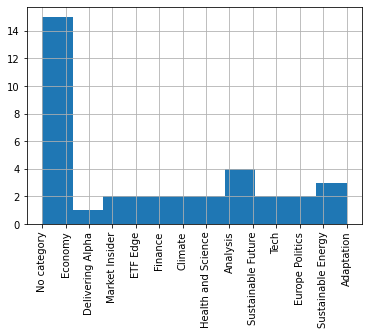

In [ ]:
#Note: A histogram is a statistical tool that represents data distribution.
#Resource: https://www.educba.com/histogram-examples/
df_all['Category'].hist()
plt.xticks(rotation=90)

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 <a list of 9 Text major ticklabel objects>)

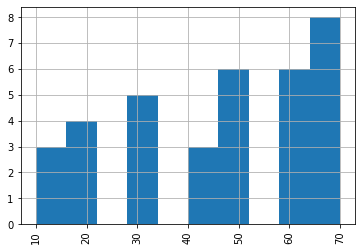

In [ ]:
df_all['Popularity'].hist()
plt.xticks(rotation=90)

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 <a list of 9 Text major ticklabel objects>)

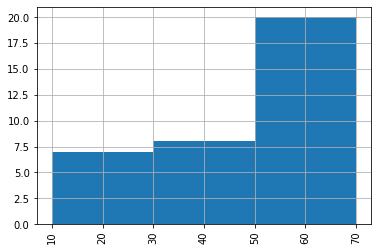

In [ ]:
df_all['Popularity'].hist(bins=3)
plt.xticks(rotation=90)

(array([ 65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105.]),
 <a list of 9 Text major ticklabel objects>)

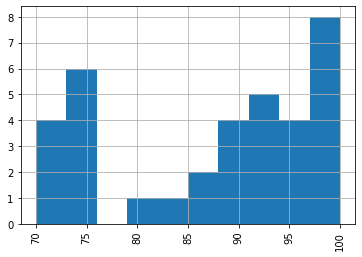

In [ ]:
df_all['User comments'].hist()
plt.xticks(rotation=90)

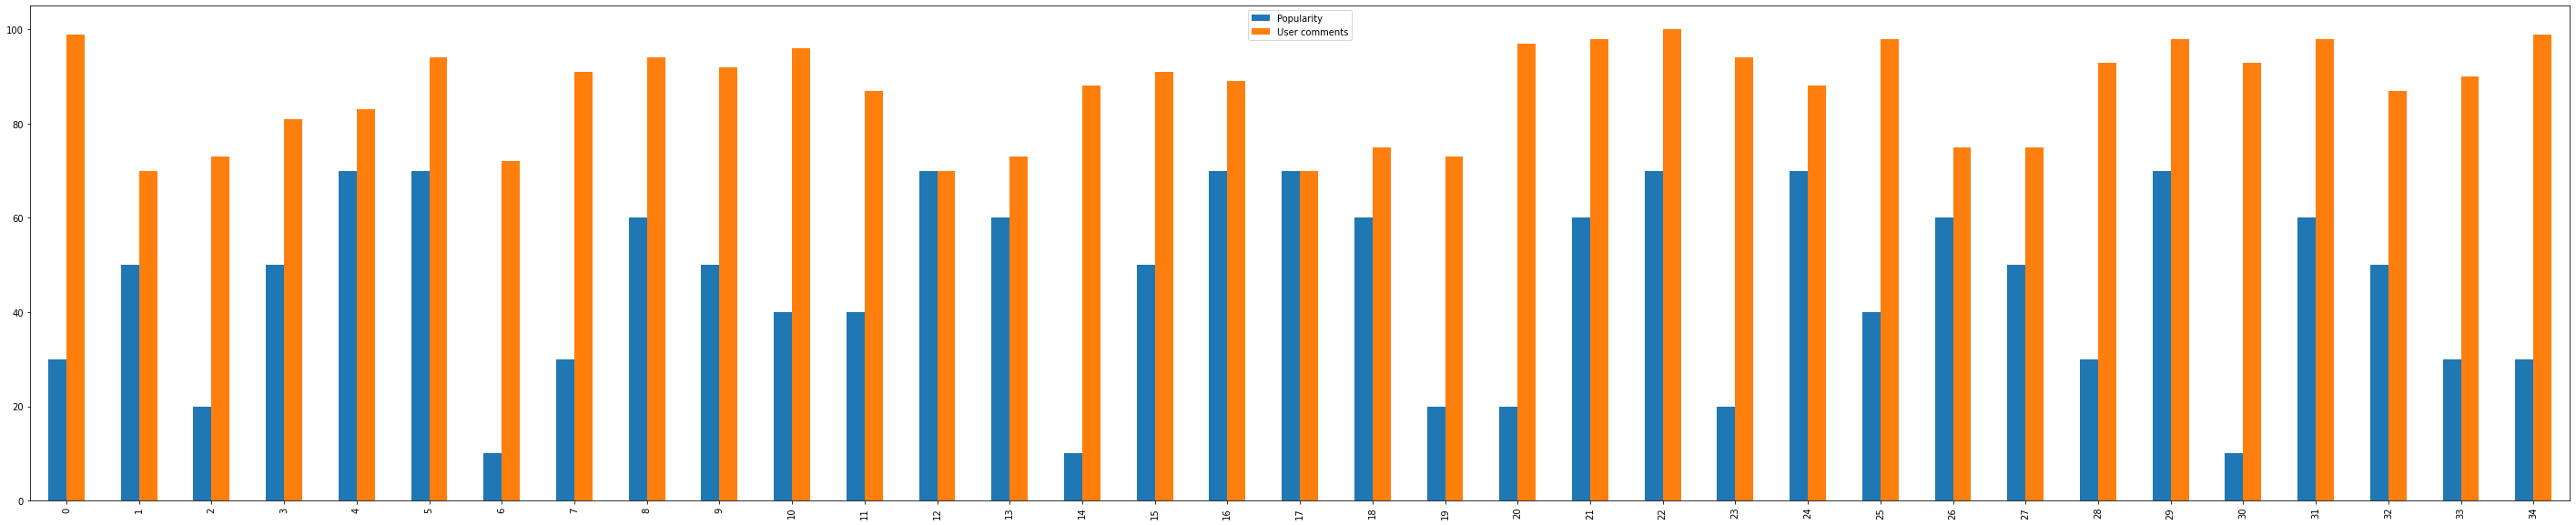

In [ ]:
#Note: A bar chart plots numeric values for levels of a categorical feature as bars.
#Resource: https://chartio.com/learn/charts/bar-chart-complete-guide/
df_all.plot.bar(figsize=(50, 10))

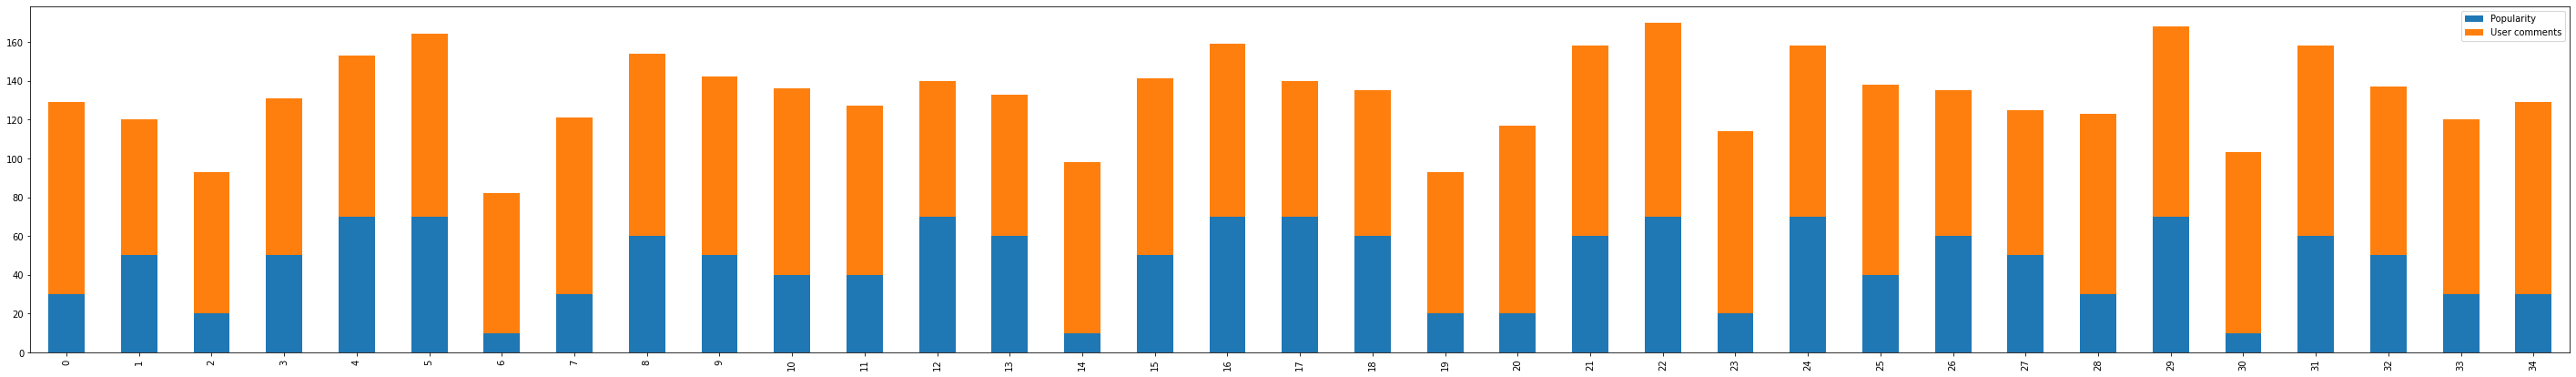

In [ ]:
df_all.plot.bar(figsize=(50, 7), stacked=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa33f241410>,
      dtype=object)

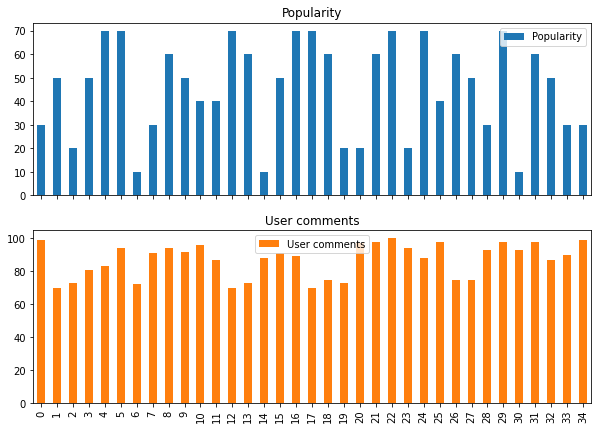

In [ ]:
df_all.plot.bar(figsize=(10, 7), subplots=True)

##### Showing trend over time

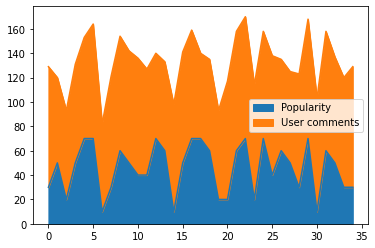

In [ ]:
#Note: Area charts are commonly used to showcase data that depicts a Time Series relationship.
#Usage: https://www.fusioncharts.com/resources/chart-primers/area-chart
df_all.plot.area()

##### Relationships

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text major ticklabel objects>)

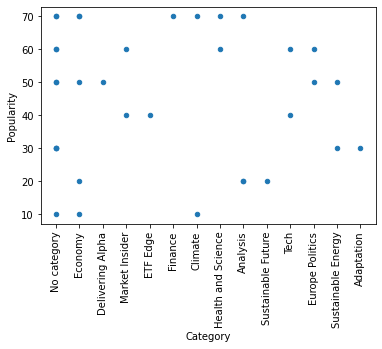

In [ ]:
#Note: A scatter plot is a special type of graph designed to show the relationship between two variables.
#Resource: https://www.dummies.com/article/business-careers-money/business/accounting/calculation-analysis/use-scatter-plots-to-identify-a-linear-relationship-in-simple-regression-analysis-145935/
df_all.plot.scatter(x='Category', y='Popularity')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text major ticklabel objects>)

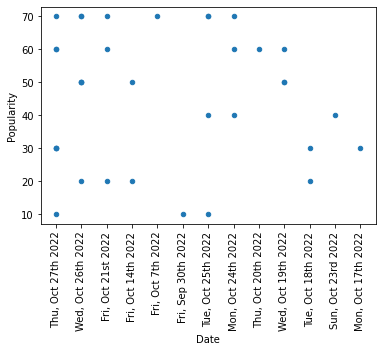

In [ ]:
df_all.plot.scatter(x='Date', y='Popularity')
plt.xticks(rotation=90)

In [ ]:
#Note: We can use the groupby function in Pandas to group the data using a criteria. Here we group by Popularity and then count the items in each Popularity group.
df_all.groupby('Popularity').count()['Title']

Popularity
10    3
20    4
30    5
40    3
50    6
60    6
70    8
Name: Title, dtype: int64

In [ ]:
df_all.groupby('Category').count()

,Date,Title,Popularity,User comments
Category,,,,
Adaptation,1,1,1,1
Analysis,3,3,3,3
Climate,2,2,2,2
Delivering Alpha,1,1,1,1
ETF Edge,1,1,1,1
Economy,5,5,5,5
Europe Politics,2,2,2,2
Finance,1,1,1,1
Health and Science,2,2,2,2


In [ ]:
df_all.groupby('Category').count().Popularity

Category
Adaptation             1
Analysis               3
Climate                2
Delivering Alpha       1
ETF Edge               1
Economy                5
Europe Politics        2
Finance                1
Health and Science     2
Market Insider         2
No category           10
Sustainable Energy     2
Sustainable Future     1
Tech                   2
Name: Popularity, dtype: int64

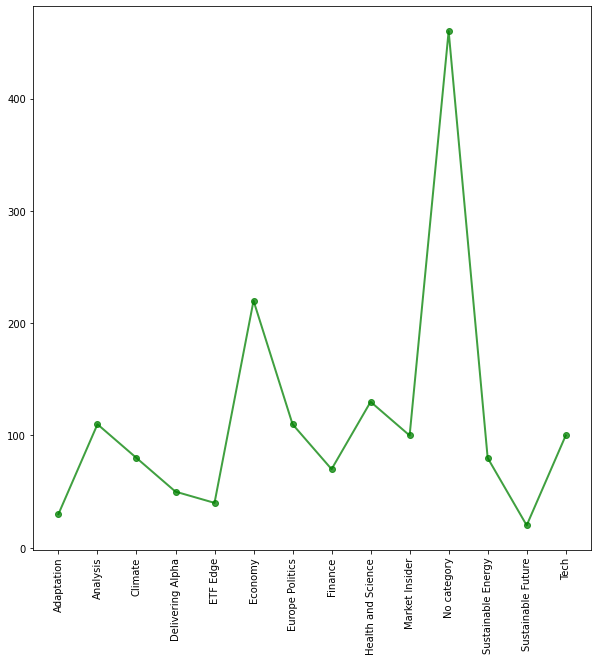

In [ ]:
#Note: We can create more complex plots using various functionalities found in matplotlib.
#Note: '-og' means plotting the dots, using a normal line, in green color
#Note: linewidth - gives the line size, aplha - gives the opacity of the line
plt.figure(figsize=[10, 10])
plt.plot(df_all.groupby('Category').Popularity.sum(), '-og', linewidth='2', alpha=0.75)
plt.xticks(rotation=90)
plt.show()

##### Comparison

In [ ]:
import seaborn as sns

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text major ticklabel objects>)

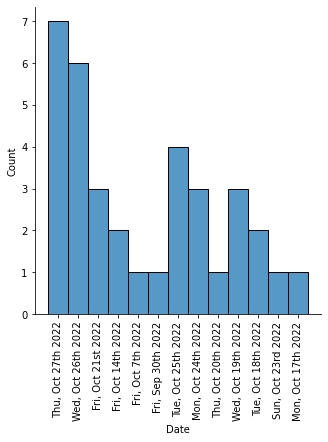

In [ ]:
sns.displot(df_all['Date'], bins=3, kde=False)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text major ticklabel objects>)

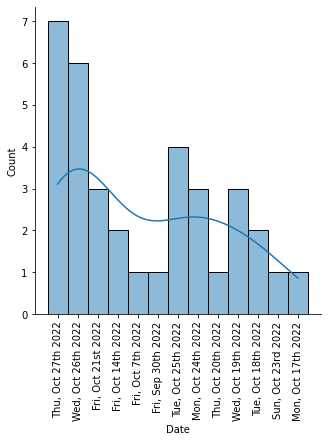

In [ ]:
#Note: KDE is a technique that enables us to create a smooth curve given a set of data.
#Resource: https://mathisonian.github.io/kde/
sns.displot(df_all['Date'], bins=3, kde=True)
plt.xticks(rotation=90)

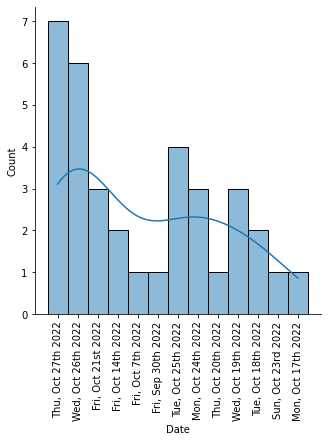

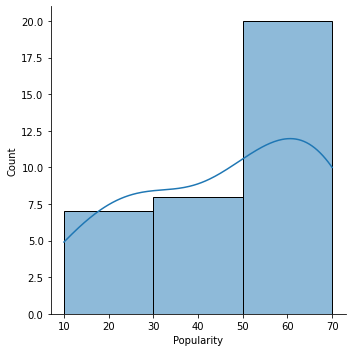

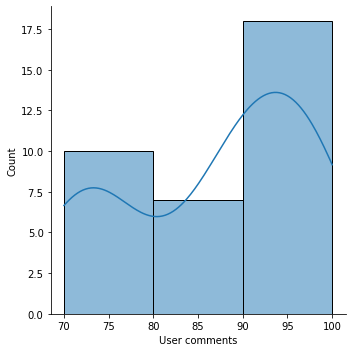

In [ ]:
first_line = sns.displot(df_all['Date'], bins=3, kde=True, label='Date')
plt.xticks(rotation=90)

second_line = sns.displot(df_all['Popularity'], bins=3, kde=True, label='Popularity')
third_line = sns.displot(df_all['User comments'], bins=3, kde=True, label='User comments')

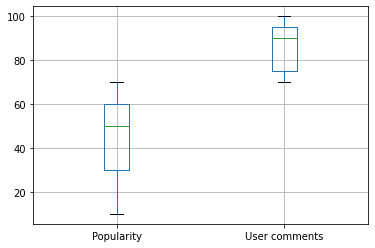

In [ ]:
#Note: Box plot is used to show the distribution of numerical data through displaying the data quartiles and averages.
#Resource: https://www.simplypsychology.org/boxplots.html
df_all.boxplot() 

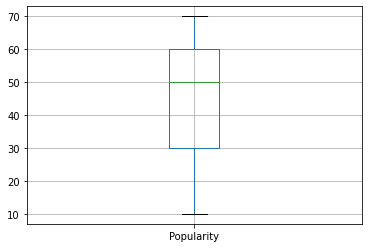

In [ ]:
df_all.boxplot(column=['Popularity']) 

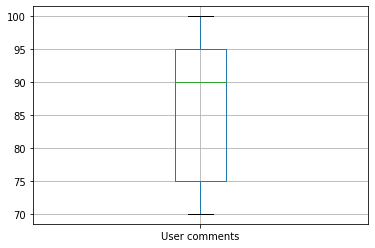

In [ ]:
df_all.boxplot(column=['User comments']) 